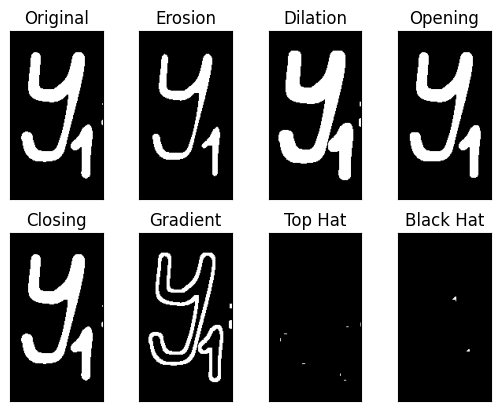

In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

#https://docs.opencv.org/3.4/d9/d61/tutorial_py_morphological_ops.html

# Загрузка изображения 
img = cv.imread('./1.jpg', cv.IMREAD_GRAYSCALE)
assert img is not None, "Файл не найден."

# 1. Бинаризация изображения ===
# Пороговое преобразование: всё, что >127, становится 255 (белое)
ret, thresh = cv.threshold(img, 127, 255, cv.THRESH_BINARY)

# 2. Создание структурирующего элемента (ядра) ===
# Ядро 5x5 заполняется единицами
kernel = np.ones((5, 5), np.uint8)

# 3. Морфологические операции ===
erosion = cv.erode(thresh, kernel, iterations=1)       # Эрозия (сжимает белые области)
dilation = cv.dilate(thresh, kernel, iterations=1)     # Дилатация (расширяет белые области)
opening = cv.morphologyEx(thresh, cv.MORPH_OPEN, kernel)  # Открытие (удаляет шум)
closing = cv.morphologyEx(thresh, cv.MORPH_CLOSE, kernel) # Закрытие (заполняет дыры)
gradient = cv.morphologyEx(thresh, cv.MORPH_GRADIENT, kernel)  # Контур
tophat = cv.morphologyEx(thresh, cv.MORPH_TOPHAT, kernel)      # Разница между изображением и открытием
blackhat = cv.morphologyEx(thresh, cv.MORPH_BLACKHAT, kernel)  # Разница между закрытием и изображением

# 4. Отображение результатов ===
titles = ['Original', 'Erosion', 'Dilation', 'Opening', 'Closing', 'Gradient', 'Top Hat', 'Black Hat']
images = [thresh, erosion, dilation, opening, closing, gradient, tophat, blackhat]

for i in range(8):
    plt.subplot(2, 4, i+1)
    plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.show()
